# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
weather_api_key = "b66506d86c28e3321e7e88b49d4983d5"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city = 'london'
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#get weather data for London and convert reponse to json
response = requests.get(query_url + city)
weather_json = response.json()
# let's see the result
display(weather_json)


{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 57.58,
  'feels_like': 51.66,
  'temp_min': 55.99,
  'temp_max': 59,
  'pressure': 1019,
  'humidity': 54},
 'visibility': 10000,
 'wind': {'speed': 6.93, 'deg': 350},
 'clouds': {'all': 90},
 'dt': 1598815701,
 'sys': {'type': 1,
  'id': 1414,
  'country': 'GB',
  'sunrise': 1598764239,
  'sunset': 1598813513},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [4]:
city_weather = []



for city in cities:
    #gets response for each city
    
    response = requests.get(query_url + city).json()
    
    try:
        city_dict = {
            "city_name" : response["name"],
            "cloudiness" : response ["clouds"]["all"],
            "country" : response["sys"]["country"],
            "data" : response["dt"],
            "humidity" :response["main"]["humidity"],
            "lat" : response["coord"]["lat"],
            "lon" : response["coord"]["lon"],
            "max_temp" : response["main"]["temp_max"],
            "wind_speed" : response["wind"]["speed"]
        }
        city_weather.append(city_dict)
    
        print(f"city_name:{response['name']} of ID:{response['id']}")
    
    # Handle exceptions for a city that is not available in the API
    except:
        # Append null values
        print("City not found. Skipping...")


city_name:Zhukovka of ID:462822
city_name:Souillac of ID:933995
city_name:Grand Gaube of ID:934479
city_name:Castro of ID:3466704
city_name:Laas of ID:3175096
city_name:Vaini of ID:4032243
city_name:Samarai of ID:2132606
city_name:Geraldton of ID:2070998
city_name:Verkh-Usugli of ID:2013459
city_name:Airai of ID:1651810
city_name:Mahon of ID:2514301
city_name:New Norfolk of ID:2155415
city_name:Leningradskiy of ID:2123814
city_name:Hasilpur of ID:1177042
city_name:Cape Town of ID:3369157
city_name:Kapaa of ID:5848280
city_name:Half Moon Bay of ID:5354943
city_name:Albany of ID:5106841
city_name:Concepción of ID:3893894
city_name:Norman Wells of ID:6089245
city_name:Nanortalik of ID:3421765
city_name:Houma of ID:4328010
city_name:Menongue of ID:3347353
city_name:Carutapera of ID:3402648
City not found. Skipping...
city_name:Bako of ID:342856
city_name:Dudinka of ID:1507116
city_name:Bang Saphan of ID:1157662
city_name:Butaritari of ID:2110227
city_name:Port Alfred of ID:964432
city_name

city_name:Medina del Campo of ID:3117010
city_name:Plattsburgh of ID:5131692
city_name:Moïssala of ID:2427697
city_name:Sampit of ID:1628884
city_name:Kruisfontein of ID:986717
city_name:Rio Grande of ID:3451138
City not found. Skipping...
city_name:Laguna of ID:5364271
city_name:Zyryanka of ID:2119283
city_name:Berlevåg of ID:780687
city_name:Kalmunai of ID:1242110
city_name:Nome of ID:5870133
city_name:Bridgewater of ID:5908723
city_name:College of ID:5859699
city_name:Kostomuksha of ID:543899
city_name:Pontal do Paraná of ID:6322927
city_name:Oranjemund of ID:3354071
City not found. Skipping...
city_name:Naze of ID:1855540
city_name:Bowen of ID:2174444
city_name:Kimbe of ID:2093967
city_name:Auki of ID:2109701
city_name:Wamba of ID:2319257
city_name:Sinnamary of ID:3380290
city_name:Alto Araguaia of ID:3472473
City not found. Skipping...
city_name:Caravelas of ID:3466980
city_name:Fairlie of ID:2649738
city_name:Qasigiannguit of ID:3420768
city_name:Petropavlovsk-Kamchatskiy of ID:2

city_name:Porto Torres of ID:3170069
city_name:Namatanai of ID:2090021
city_name:Cherskiy of ID:2126199
city_name:Ixtapa of ID:4004293
city_name:Benghazi of ID:88319
city_name:Clarence Town of ID:2171465
city_name:Seymchan of ID:2121373
city_name:Kangaatsiaq of ID:3422683
city_name:Palmer of ID:4946620
city_name:Philadelphia of ID:4560349
city_name:Mount Isa of ID:2065594
City not found. Skipping...
city_name:Lorengau of ID:2092164
city_name:Beloha of ID:1067565
city_name:Līsakovsk of ID:1521315
city_name:Mokhsogollokh of ID:2019867
city_name:Bilma of ID:2446796
city_name:Santa Cruz del Norte of ID:3537845
city_name:Cubará of ID:3685571
city_name:Paraná of ID:3841956
city_name:Malanje of ID:2239862
city_name:Pokrovskoye of ID:507427
city_name:Waipawa of ID:2206874
city_name:Yakeshi of ID:2033536
city_name:Ajdabiya of ID:89113
city_name:Lakes Entrance of ID:2160735
city_name:Khanbari of ID:1283217
city_name:Sertânia of ID:3387663
city_name:Escárcega of ID:3527795
city_name:Tungor of ID:

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame(city_weather)
weather_df.head()

,city_name,cloudiness,country,data,humidity,lat,lon,max_temp,wind_speed
0,Zhukovka,0,RU,1598816243,69,53.53,33.73,66.00,8.79
1,Souillac,75,MU,1598816039,83,-20.52,57.52,71.60,18.34
2,Grand Gaube,1,MU,1598816244,77,-20.01,57.66,71.01,5.99
3,Castro,0,BR,1598816245,54,-24.79,-50.01,76.35,3.49
4,Laas,67,IT,1598816246,88,46.62,10.70,62.60,2.24


In [25]:
weather_df.to_csv("weather_df.csv")
weather_df.describe()

,cloudiness,data,humidity,lat,lon,max_temp,wind_speed
count,562.000000,5.620000e+02,562.000000,562.000000,562.000000,562.000000,562.000000
mean,49.144128,1.598816e+09,70.241993,19.157046,19.079520,67.060516,8.292705
std,39.266068,1.873161e+02,21.368304,33.820176,89.454803,15.189525,5.722887
min,0.000000,1.598816e+09,1.000000,-54.800000,-179.170000,28.400000,0.110000
25%,3.000000,1.598816e+09,58.000000,-8.890000,-60.632500,54.022500,3.835000
50%,44.000000,1.598816e+09,75.000000,21.060000,23.470000,69.630000,6.930000
75%,90.000000,1.598817e+09,87.000000,49.892500,96.310000,78.800000,11.492500
max,100.000000,1.598817e+09,100.000000,78.220000,179.320000,104.540000,29.970000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
humid = weather_df.loc[weather_df["humidity"]>100]
humid

,city_name,cloudiness,country,data,humidity,lat,lon,max_temp,wind_speed


In [27]:
#  Get the indices of cities that have humidity over 100%.


In [28]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

FileNotFoundError: [Errno 2] No such file or directory: '..WeatherPy/Output/Temperature (F) vs. Latitude.png'

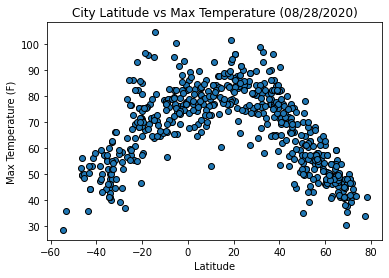

In [42]:
plt.scatter(weather_df["lat"],weather_df["max_temp"],edgecolor ="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature (08/28/2020)")
plt.savefig("..WeatherPy/Output/Temperature (F) vs. Latitude.png")

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs Humidity (08/28/2020)')

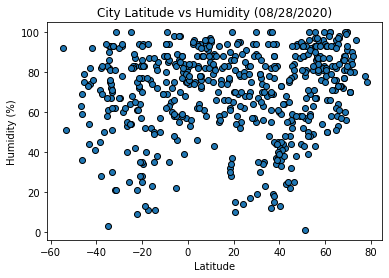

In [30]:
plt.scatter(weather_df["lat"],weather_df["humidity"],edgecolor ="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (08/28/2020)")

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs Cloudiness (08/28/2020)')

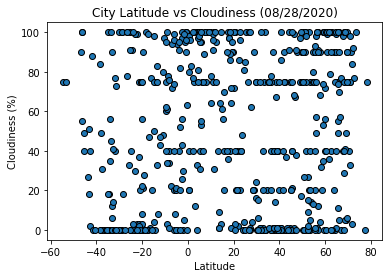

In [31]:
plt.scatter(weather_df["lat"],weather_df["cloudiness"],edgecolor ="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (08/28/2020)")

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs Wind Speed (08/28/2020)')

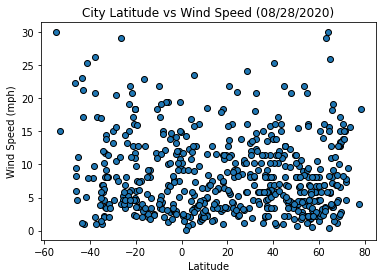

In [32]:
plt.scatter(weather_df["lat"],weather_df["wind_speed"],edgecolor ="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (08/28/2020)")

## Plots for Linear Regression

### Create northen and sourthen hemisphere

In [33]:
north_hem = weather_df.loc[weather_df["lat"]>= 0]
south_hem = weather_df.loc[weather_df["lat"]< 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6298846770514241


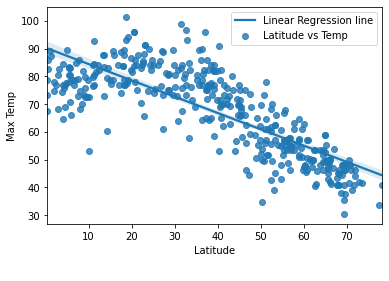

In [34]:
import seaborn as sb
x_values = north_hem["lat"]
y_values = north_hem["max_temp"]
sb.regplot(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.legend(labels=['Linear Regression line', 'Latitude vs Temp'])
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5731670348774055


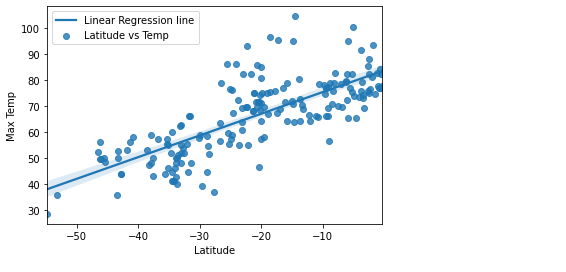

In [35]:
x_values = south_hem["lat"]
y_values = south_hem["max_temp"]
sb.regplot(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.legend(labels=['Linear Regression line', 'Latitude vs Temp'])
print(f"The r-squared is: {rvalue**2}")
plt.show()



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0036970242543248387


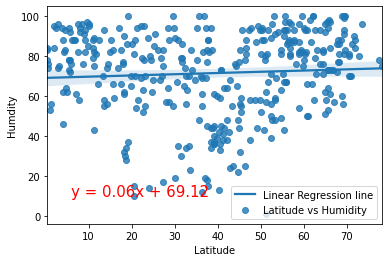

In [36]:
x_values = north_hem["lat"]
y_values = north_hem["humidity"]
sb.regplot(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humdity")
plt.legend(labels=['Linear Regression line', 'Latitude vs Humidity'])
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.006485361959879985


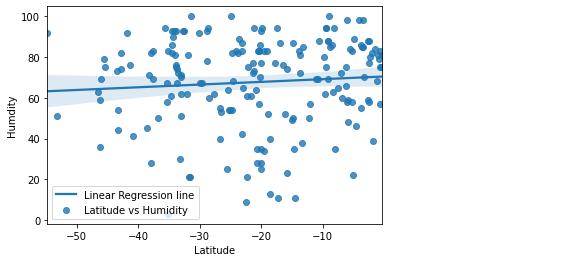

In [37]:
x_values = south_hem["lat"]
y_values = south_hem["humidity"]
sb.regplot(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humdity")
plt.legend(labels=['Linear Regression line', 'Latitude vs Humidity'])
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.006048571431286788


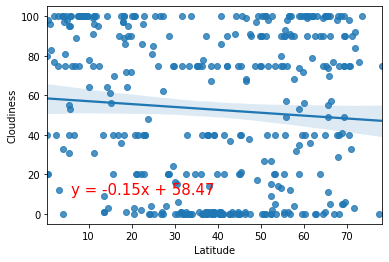

In [38]:
x_values = north_hem["lat"]
y_values = north_hem["cloudiness"]
sb.regplot(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
#plt.legend(labels=['Linear Regression line', 'Latitude vs Cloudiness'])
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03069844496648469


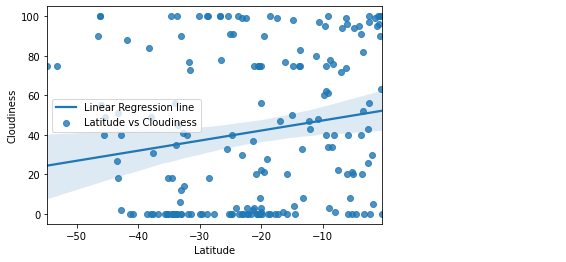

In [39]:
x_values = south_hem["lat"]
y_values = south_hem["cloudiness"]
sb.regplot(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.legend(labels=['Linear Regression line', 'Latitude vs Cloudiness'])
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.007111260686627844


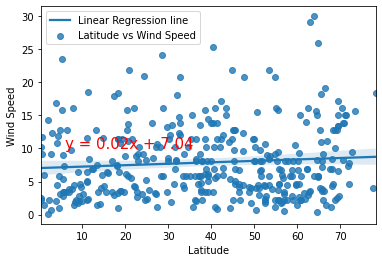

In [40]:
x_values = north_hem["lat"]
y_values = north_hem["wind_speed"]
sb.regplot(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.legend(labels=['Linear Regression line', 'Latitude vs Wind Speed'])
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.013238903516007774


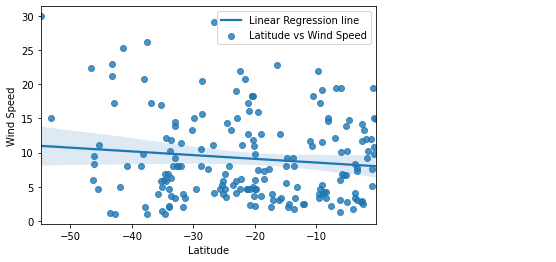

In [41]:
x_values = south_hem["lat"]
y_values = south_hem["wind_speed"]
sb.regplot(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.legend(labels=['Linear Regression line', 'Latitude vs Wind Speed'])
print(f"The r-squared is: {rvalue**2}")
plt.show()